In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
df = pd.read_csv('Z_boson.csv')
df 

,Unnamed: 0,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,Zmumu
1,1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,Zee
2,2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,Zee
3,3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,Zee
4,4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,Zmumu
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,163589,25170371,39.1588,0.0434,2.8371,-1,48.0734,-0.8716,-0.7647,1,Zmumu
19996,19996,166033,486199311,38.4240,-1.3922,-1.9531,-1,30.3328,-0.9045,0.8390,1,Zmumu
19997,19997,173389,687651225,35.2640,-2.2673,-0.3794,-1,37.2768,-1.8151,2.9126,-1,Zee
19998,19998,172163,191162958,38.9526,-2.2869,1.4960,-1,48.5297,-2.1804,-1.0817,1,Zee


In [ ]:
df['class'] = df['class'].map({'Zee': 1, 'Zmumu': 0}) 
df = df.drop(['Unnamed: 0'], axis=1) 
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     20000 non-null  int64  
 1   Event   20000 non-null  int64  
 2   pt1     20000 non-null  float64
 3   eta1    20000 non-null  float64
 4   phi1    20000 non-null  float64
 5   Q1      20000 non-null  int64  
 6   pt2     20000 non-null  float64
 7   eta2    20000 non-null  float64
 8   phi2    20000 non-null  float64
 9   Q2      20000 non-null  int64  
 10  class   20000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.7 MB


<Axes: xlabel='class', ylabel='count'>

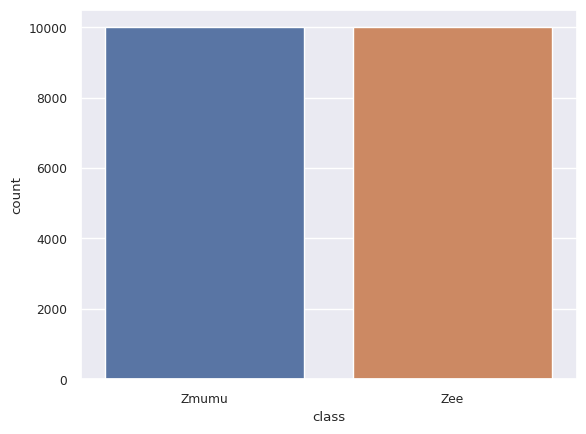

In [ ]:
sns.set(font_scale=0.8)
sns.set_style('darkgrid')
df1 = df.copy()
df1['class'] = df1['class'].map({1: 'Zee', 0: 'Zmumu'})
sns.countplot(data=df1, x="class",palette ='deep')  

<ipython-input-141-f3028cff62a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:,2], color="blue", ax=axes[0])
<ipython-input-141-f3028cff62a9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:,6], color="red", ax=axes[1])


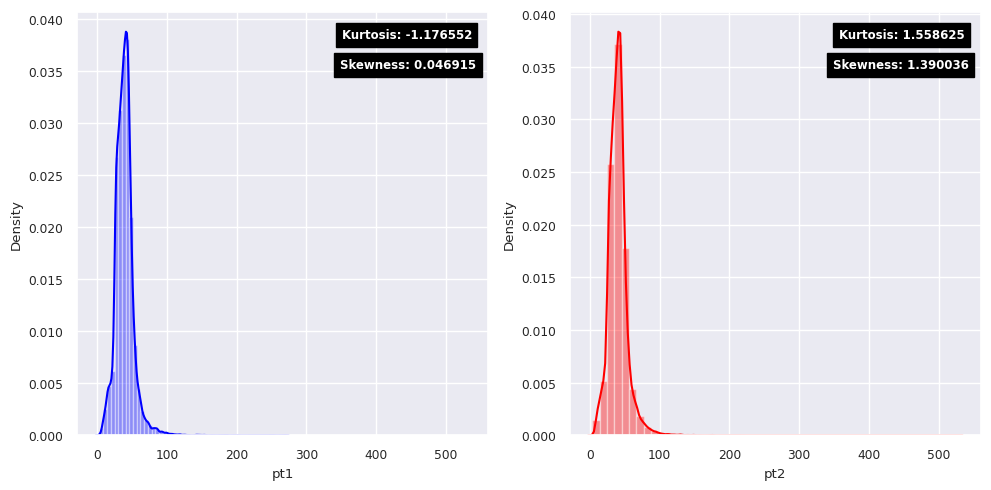

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df.iloc[:,2], color="blue", ax=axes[0])
sns.distplot(df.iloc[:,6], color="red", ax=axes[1]) 
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.96, y=0.96, transform=ax.transAxes, s="Kurtosis: %f" % df.iloc[:,i].kurt(),\
        fontweight='bold', fontsize=8.5, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='black', color='white')
    ax.text(x=0.97, y=0.89, transform=ax.transAxes, s="Skewness: %f" % df.iloc[:,i].skew(),\
        fontweight='bold', fontsize=8.5, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='black', color='white')
plt.tight_layout()

<Axes: >

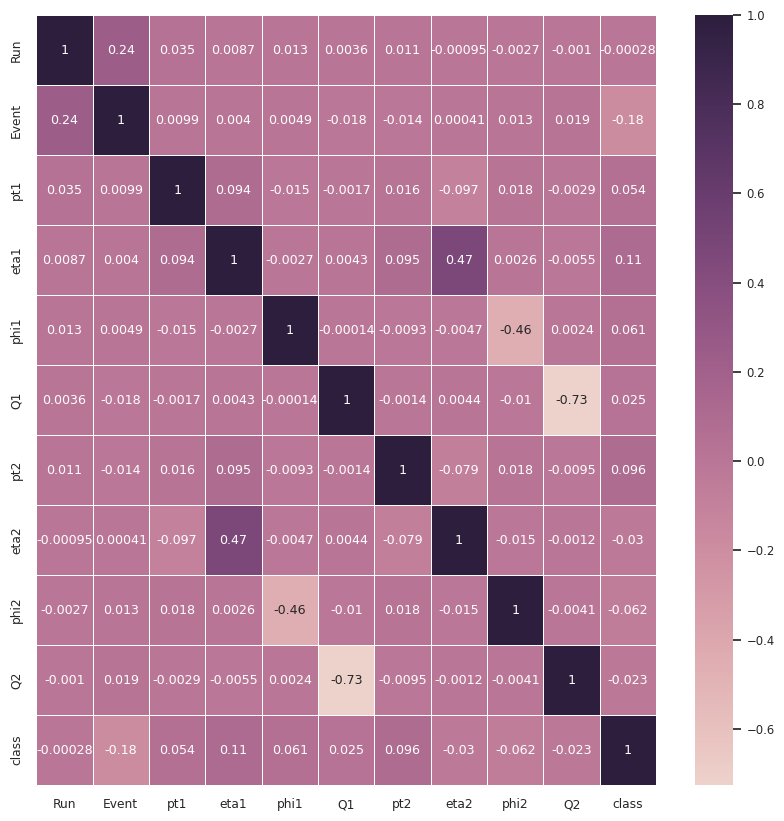

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.set(font_scale=0.76)
sns.heatmap(df.corr(),linewidths=0.5,annot=True,ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))

<Figure size 750x750 with 0 Axes>

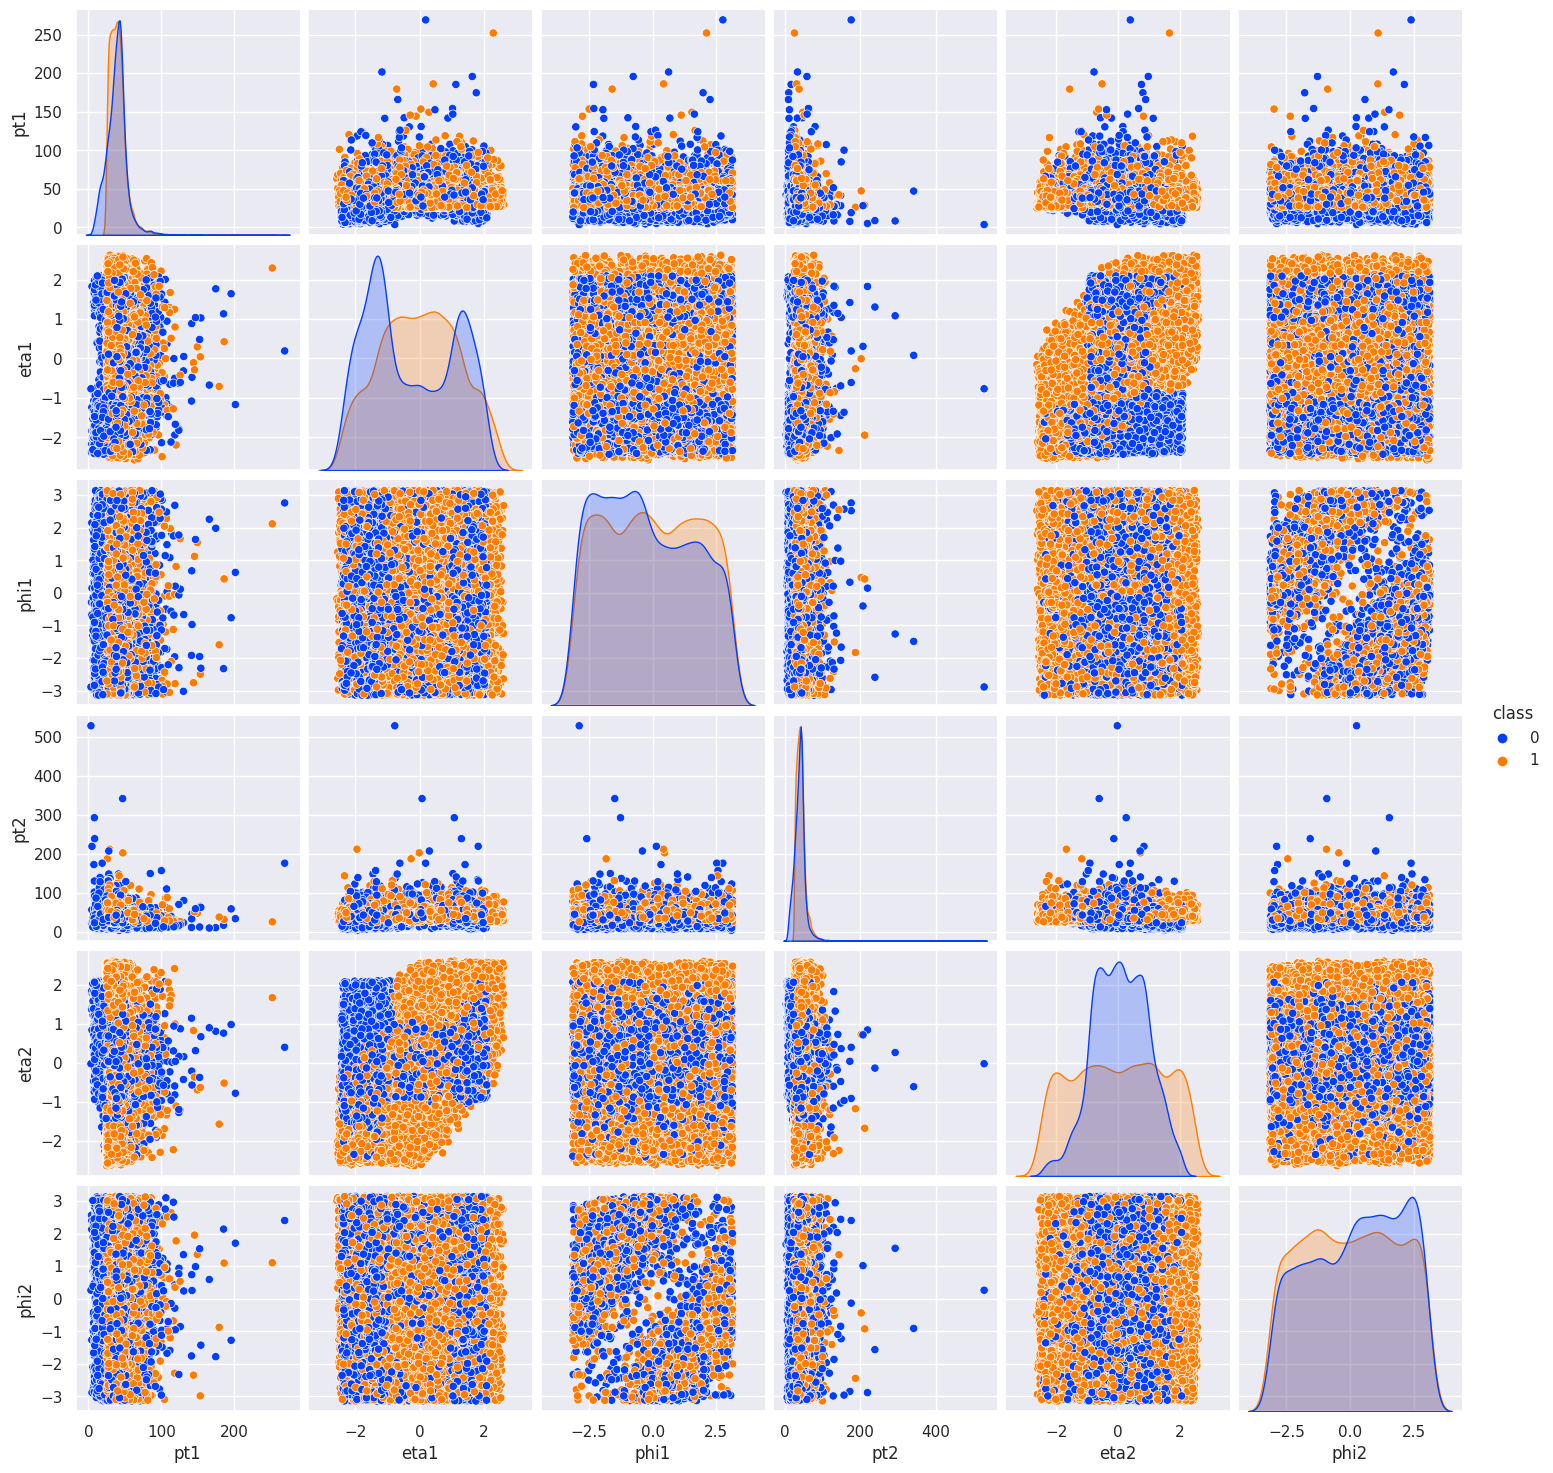

In [ ]:
df1 = df[['pt1', 'eta1', 'phi1', 'pt2', 'eta2', 'phi2', 'class']]
plt.figure(figsize=(7.5, 7.5))
sns.set(font_scale=1.0)
sns.pairplot(df1, hue="class", palette="bright")

In [ ]:
X = df.drop(['class'], axis=1) 
y = df['class']  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
KNClf = KNeighborsClassifier(n_neighbors = 8) 
KNClf.fit(X_train_scaled, y_train) 

In [ ]:
a= format(KNClf.score(X_train_scaled, y_train))
b= format(KNClf.score(X_test_scaled, y_test))
print('Accuracy of KNeighborsClassifier on train set:',(float(a)*100),'%')
print('Accuracy of KNeighborsClassifier on test set:',(float(b)*100),'%')

Accuracy of KNeighborsClassifier on train set: 85.34615384615385 %
Accuracy of KNeighborsClassifier on test set: 82.04545454545455 %


In [ ]:
Model_Prediction_knn = KNClf.predict(X_test_scaled)
d = {'Real Values': y_test, 'Prediction': Model_Prediction_knn} 
dfC = pd.DataFrame(data=d)
dfC = dfC.replace({1: 'Zee', 0: 'Zmumu'})
dfC.head(50) 

,Real Values,Prediction
19134,Zee,Zee
4981,Zee,Zmumu
16643,Zee,Zee
19117,Zee,Zmumu
5306,Zee,Zmumu
230,Zmumu,Zmumu
3148,Zmumu,Zmumu
11525,Zee,Zee
13672,Zee,Zee
1624,Zee,Zee
